In [ ]:
import zipfile

# Path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/zip_of_safety_gear_detection_final.zip'

# Extract to the current content directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Extract directly to /content



In [ ]:
import os
os.listdir('/content')


['.config', 'safety gear detection final', 'drive', 'sample_data']

In [1]:
pip install ultralytics



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from matplotlib.patches import Rectangle
import glob
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
warnings.filterwarnings("ignore")

np.random.seed(12345)

%matplotlib inline

!wandb disabled

/bin/bash: line 1: wandb: command not found


In [ ]:
# Input_path = '/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data'
# Work_path = '/kaggle/working/'

Input_path = '/content/safety gear detection final/css-data'
  # Assuming css-data is the dataset folder name inside your extracted folder
Work_path = '/content/safety gear detection final/results_yolov8n_100e/kaggle/working'



In [ ]:
num_classes = 10
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

In [ ]:
# Dictionary for class index
class_idx = {str(i): classes[i] for i in range(num_classes)}

In [ ]:
dict_file = {
    'train': os.path.join(Input_path, 'train'),
    'val': os.path.join(Input_path, 'valid'),
    'test': os.path.join(Input_path, 'test'),
    'nc': num_classes,  # Number of classes
    'names': classes    # Class names
}

In [ ]:
import os
import yaml  # Make sure to import yaml if it's not already

# Define Work_path as the directory where you want to save `data.yaml`
os.makedirs(Work_path, exist_ok=True)  # Ensure the path exists

# Update file_path to point to the new location in Colab
file_path = os.path.join(Work_path, 'data.yaml')

# Open file and save the updated data to YAML
with open(file_path, 'w') as file:
    yaml.dump(dict_file, file)


In [ ]:
class_stat = {}
data_len = {}

# Updated Input_path to the Colab location

# Checking for the presence of new classes in the annotations
for mode in ['train', 'valid', 'test']:
    class_count = {classes[i]: 0 for i in range(num_classes)}  # Update class count with new classes
    path = os.path.join(Input_path, mode, 'labels')  # Updated path for each mode

    for file in os.listdir(path):
        with open(os.path.join(path, file)) as f:
            lines = f.readlines()
            for cls in set([line.split()[0] for line in lines]):  # Class ID is the first character of each line
                class_count[class_idx[cls]] += 1

    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count


In [ ]:
for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:\n')
    img_size = 0
    for file in glob.glob(os.path.join(Input_path, mode, 'images', '*')):
        image = Image.open(file)
        if image.size != img_size:
            print(f'\t{image.size}')
            img_size = image.size


Image sizes in train set:

	(640, 640)

Image sizes in valid set:

	(640, 640)

Image sizes in test set:

	(640, 640)


In [ ]:
# Print the number of images in each dataset
for mode in ['train', 'valid', 'test']:
    files = glob.glob(os.path.join(Input_path, mode, 'images', '*'))
    print(f'{mode} set size: {len(files)}\n')

train set size: 2605

valid set size: 114

test set size: 82



In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 79.8MB/s]


In [ ]:
model.train(data=os.path.join(Work_path,'data.yaml'),
            task='detect',
            imgsz=640,
            epochs=10,
            batch=32,
            mode='train',
            name='yolov8n_v1_train')

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/safety gear detection final/results_yolov8n_100e/kaggle/working/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/safety gear detection final/css-data/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:02<00:00, 1139.06it/s]

train: WARNING ⚠️ /content/safety gear detection final/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/safety gear detection final/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: New cache created: /content/safety gear detection final/css-data/train/labels.cache


val: Scanning /content/safety gear detection final/css-data/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 1231.52it/s]


val: New cache created: /content/safety gear detection final/css-data/valid/labels.cache
Plotting labels to runs/detect/yolov8n_v1_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8n_v1_train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.421      2.919      1.518        150        640: 100%|██████████| 82/82 [05:41<00:00,  4.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.66s/it]

                   all        114        697      0.482       0.23      0.302      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.357        1.9      1.472        132        640: 100%|██████████| 82/82 [05:43<00:00,  4.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.58s/it]

                   all        114        697      0.554      0.417      0.443      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.313      1.685      1.437        164        640: 100%|██████████| 82/82 [05:46<00:00,  4.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.04s/it]

                   all        114        697      0.534      0.514      0.519       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.278      1.571       1.41        153        640: 100%|██████████| 82/82 [05:50<00:00,  4.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.19s/it]

                   all        114        697       0.61      0.431      0.477      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G       1.23      1.452      1.373        138        640: 100%|██████████| 82/82 [05:50<00:00,  4.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.84s/it]

                   all        114        697      0.656      0.526      0.566      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.202      1.356      1.345        168        640: 100%|██████████| 82/82 [05:51<00:00,  4.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.76s/it]

                   all        114        697      0.731      0.549      0.601      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.164      1.282      1.315        105        640: 100%|██████████| 82/82 [05:53<00:00,  4.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.09s/it]

                   all        114        697      0.773      0.551      0.638      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.129      1.199      1.287        215        640: 100%|██████████| 82/82 [05:51<00:00,  4.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]

                   all        114        697      0.793       0.59      0.655      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.098      1.141      1.271        145        640: 100%|██████████| 82/82 [05:50<00:00,  4.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]

                   all        114        697       0.79      0.625       0.68      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.068      1.085      1.245        178        640: 100%|██████████| 82/82 [05:53<00:00,  4.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.93s/it]

                   all        114        697      0.839      0.613      0.695      0.361



10 epochs completed in 0.990 hours.
Optimizer stripped from runs/detect/yolov8n_v1_train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_v1_train/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_v1_train/weights/best.pt...
Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]


                   all        114        697      0.839      0.618      0.694       0.36
               Hardhat         42         79      0.977      0.696      0.819      0.489
                  Mask         19         21       0.93       0.81      0.827      0.458
            NO-Hardhat         37         69       0.78      0.514      0.564      0.245
               NO-Mask         44         74      0.811      0.407       0.49      0.194
        NO-Safety Vest         56        106      0.796      0.547      0.592      0.264
                Person         84        166      0.857      0.686       0.77      0.412
           Safety Cone         13         44        0.8       0.75      0.781      0.372
           Safety Vest         28         41      0.887      0.659      0.765      0.416
             machinery         26         55      0.802      0.736      0.789      0.477
               vehicle         16         42      0.748      0.381      0.544      0.276
Speed: 0.5ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2d09d639d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [ ]:
model = YOLO('/content/runs/detect/yolov8n_v1_train/weights/best.pt')

In [ ]:
results = model.predict(source=os.path.join(Input_path, 'test', 'images'), save=True)


image 1/82 /content/safety gear detection final/css-data/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg: 640x640 1 Person, 53.2ms
image 2/82 /content/safety gear detection final/css-data/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 1 Hardhat, 2 NO-Masks, 2 Persons, 3 machinerys, 50.8ms
image 3/82 /content/safety gear detection final/css-data/test/images/002551_jpg.rf.ce4b9f934161faa72c80dc6898d37b2d.jpg: 640x640 2 Hardhats, 1 NO-Mask, 3 NO-Safety Vests, 3 Persons, 53.3ms
image 4/82 /content/safety gear detection final/css-data/test/images/003357_jpg.rf.9867f91e88089bb68dc95947d5116d14.jpg: 640x640 1 Safety Cone, 48.7ms
image 5/82 /content/safety gear detection final/css-data/test/images/004063_jpg.rf.1b7cdc4035bcb24ef69b8798b444053e.jpg: 640x640 5 Hardhats, 5 NO-Safety Vests, 6 Persons, 1 Safety Vest, 48.7ms
image 6/82 /content/safety gear detection final/css-data/test/images/004763_jpg.rf.46484e6ca73caeaa9de45822cf1085a9.jpg: 640x640 3 H

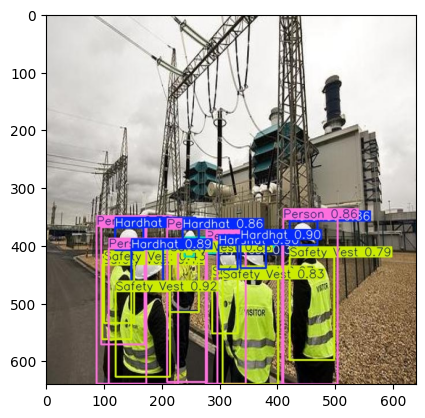

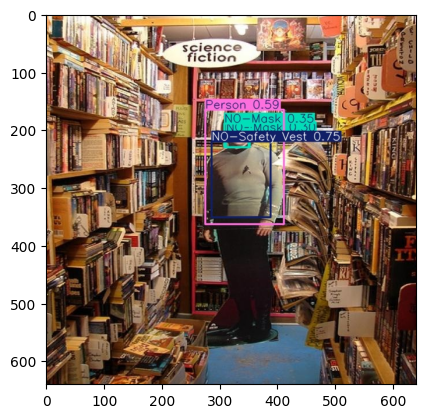

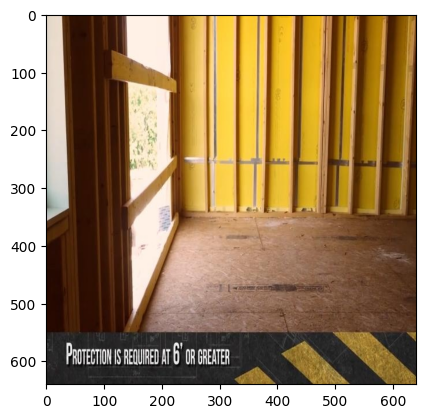

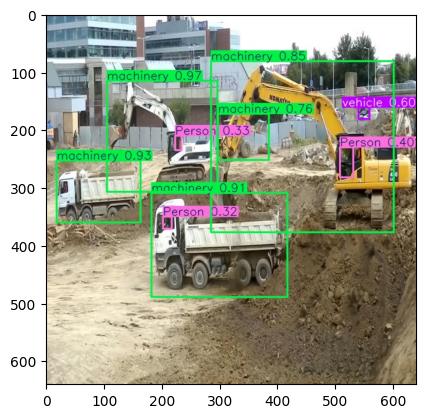

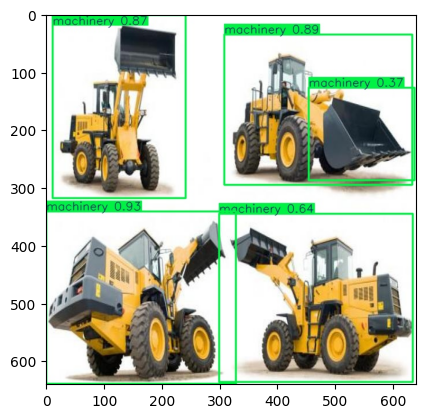

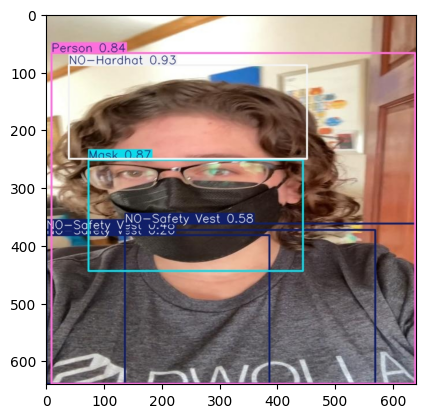

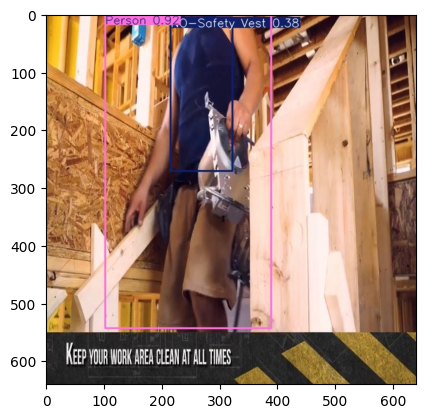

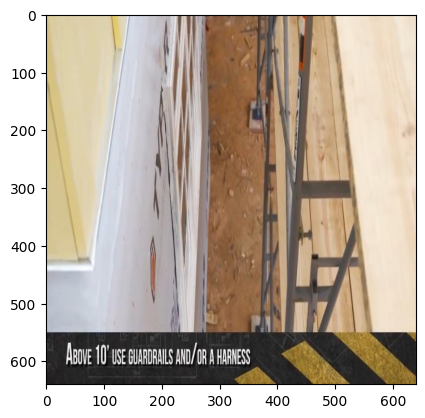

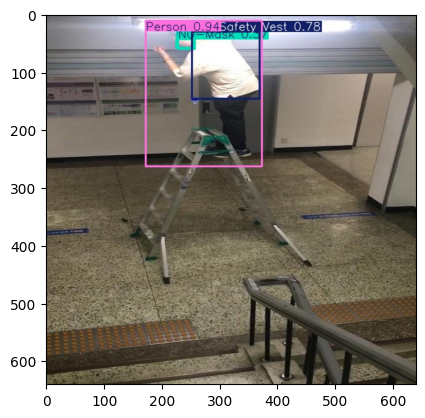

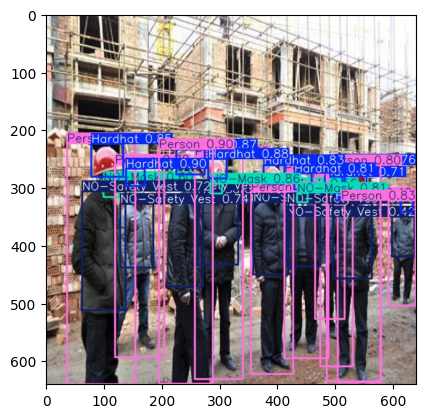

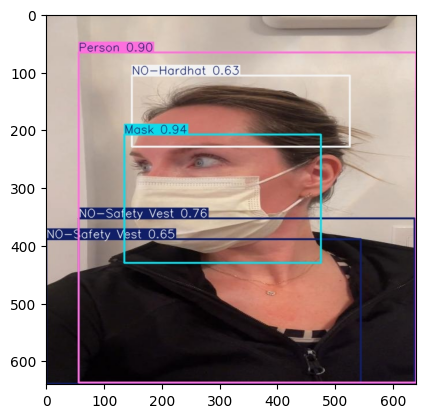

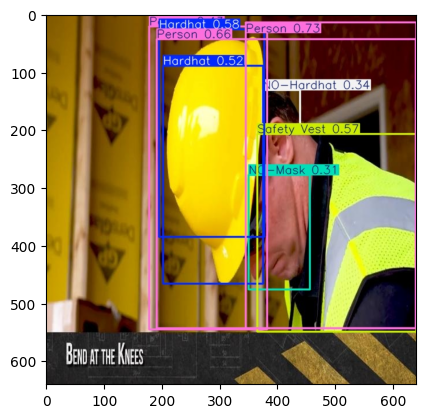

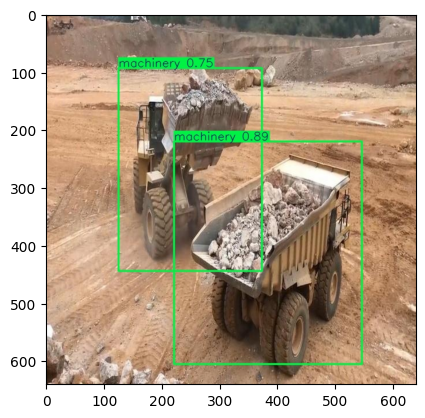

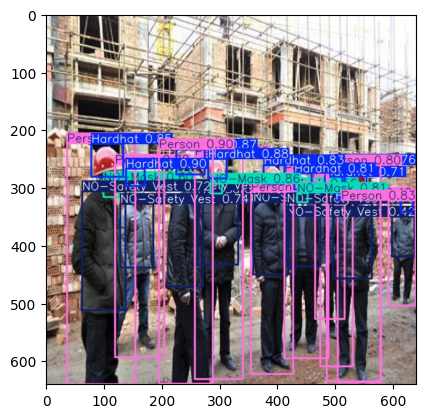

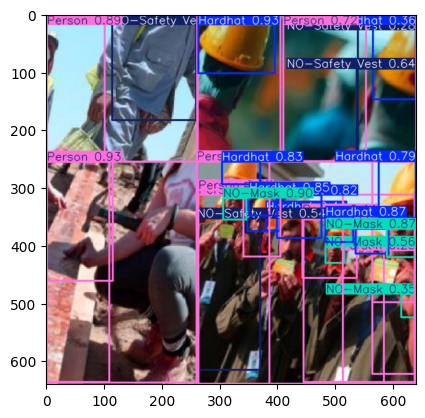

In [ ]:
%matplotlib inline

predicitions = glob.glob(os.path.join(Work_path, '/content/runs/detect/predict', '*'))
n = 15

for i in range(n):
    idx = np.random.randint(0, len(predicitions))
    image = Image.open(predicitions[idx])
    plt.imshow(image)
    plt.grid(False)
    plt.show()

milestone 3 maybe?

In [ ]:
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image
import os